Total frames in audio: 2


TypeError: only length-1 arrays can be converted to Python scalars

Total frames in audio: 2
Error in callback <function _draw_all_if_interactive at 0x000002772A0D0540> (for post_execute), with arguments args (),kwargs {}:


TypeError: only length-1 arrays can be converted to Python scalars

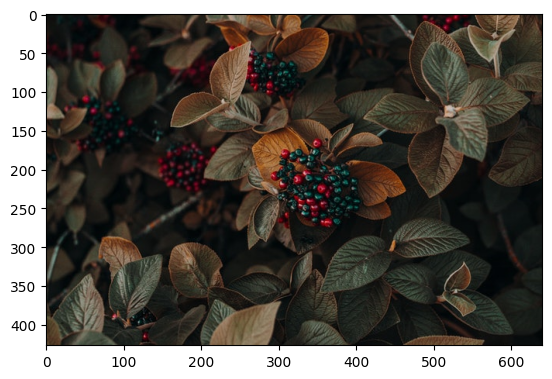

In [2]:
import wave
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

audio_path = "triumph.wav"
aud = wave.open(audio_path, 'rb')

fig, ax = plt.subplots()
image = Image.open('img1.jpg')
imgplot = ax.imshow(image, animated=True)

num_frames = aud.getnframes()
frame_rate = aud.getframerate()
duration = num_frames / frame_rate
sample_width = aud.getsampwidth()
frames = aud.readframes(aud.getnframes())

# Function to update the image for each frame
def update(frame):
    # Calculate the current time in the audio
    current_time = frame / frame_rate

    # Read a frame of audio data
    aud_data = np.frombuffer(aud.readframes(1), dtype=np.int16)

  
    # Process the audio data to determine the contrast adjustment
    color_enhancer = ImageEnhance.Color(image)
    contrast_enhancer = ImageEnhance.Contrast(image)
    brightness_enhancer = ImageEnhance.Brightness(image)
    sharpness_enhancer = ImageEnhance.Sharpness(image)
    
    print(f"Total frames in audio: {sample_width}")

    # Update the image based on the audio processing result
    value = aud_data

    # Modify the image using Pillow or any other image processing library

    # Update 'image' here with the processed image
    image2 = contrast_enhancer.enhance(value)

    imgplot.set_array(image2)

# Create the animation
anim = FuncAnimation(fig, update, frames=num_frames, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()